In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train, y_train = readucr("/content/drive/MyDrive/FordA_TRAIN.tsv")
x_test, y_test = readucr("/content/drive/MyDrive/FordA_TEST.tsv")

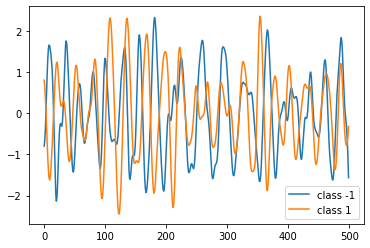

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


In [ ]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

## Build a model

In [ ]:
input_layer = keras.layers.Input((500, 1))

x = keras.layers.Flatten()(input_layer)
x = keras.layers.Dense(units=64)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.Dense(units=64)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.Dense(num_classes, activation="softmax")(x)
model = keras.models.Model(inputs=input_layer, outputs=x)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 500)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                32064     
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 re_lu_11 (ReLU)             (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                           

## Train the model

In [ ]:
epochs = 300
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/300
113/113 [==============================] - 2s 7ms/step - loss: 0.6232 - sparse_categorical_accuracy: 0.6548 - val_loss: 0.5852 - val_sparse_categorical_accuracy: 0.6917 - lr: 0.0010
Epoch 2/300
113/113 [==============================] - 1s 5ms/step - loss: 0.5088 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.5495 - val_sparse_categorical_accuracy: 0.7227 - lr: 0.0010
Epoch 3/300
113/113 [==============================] - 1s 5ms/step - loss: 0.4540 - sparse_categorical_accuracy: 0.8003 - val_loss: 0.5225 - val_sparse_categorical_accuracy: 0.7386 - lr: 0.0010
Epoch 4/300
113/113 [==============================] - 1s 5ms/step - loss: 0.3925 - sparse_categorical_accuracy: 0.8314 - val_loss: 0.4908 - val_sparse_categorical_accuracy: 0.7621 - lr: 0.0010
Epoch 5/300
113/113 [==============================] - 1s 5ms/step - loss: 0.3546 - sparse_categorical_accuracy: 0.8475 - val_loss: 0.4941 - val_sparse_categorical_accuracy: 0.7644 - lr: 0.0010
Epoch 6/300
113/113 [=========

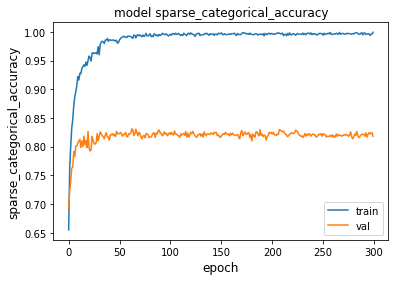

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()